# Intersects, Contains, Touches, Covered By? Spatial Relationships De-mystified

## Purpose
Any casual (or not so casual) user of GIS software will soon have a need to filter data spatially
- select all the lines interacting with this tile polygon
- filter all the addresses within this postcode area
- filter all road links intersecting the Wiltshire Council admin unit

BUT - the language used above could be ambiguous, and interpreted in different ways
- what does 'interacting with' mean
  - does it include lines that are largely outside the tile, but have one end point on the boundary of the tile
- what does 'within' mean?
  - does it include addresses on the boundary?

In order to clarify the precise meaning of the spatial relationships between features, we need:
- an agreed vocabulary of relationships
- an agreed set of principles relating the properties of different types of geometries

This session will describe:
- the meaning of the different types of spatial relationship and when to use them
- the spatial theory under-pinning the relationships (DE-9IM)

Hopefully this will allow people using geospatial software / libraries to be freed from defaulting to what is seen as the safe option - 'INTERSECT'!

Note: If running this notebook, the Python environment will need geopandas (which includes shapely) and matplotlib installed
  

## A Quick Quiz
We will look at some common spatial relationship scenarios to establish some terminology and identify some of the ambiguity. We will use Shapely to test the spatial relationships, and Geopandas and Matplotlib to display the geometries. First lets load some helper functions.

In [1]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

def create_data_frame(geom_list):
    df = gpd.GeoDataFrame(columns=["id", "geometry"])
    
    for i, geom in enumerate(geom_list):
        df.loc[i] = [i, geom]
        
    return df

def calc_predicates(geom1, geom2):
    predicates_report = ("\t\tAB\tBA\n"
        + f"Equals\t\t{geom1.equals(geom2)}\t{geom2.equals(geom1)}\n"
        + f"Disjoint\t{geom1.disjoint(geom2)}\t{geom2.disjoint(geom1)}\n"
        + f"Intersects\t{geom1.intersects(geom2)}\t{geom2.intersects(geom1)}\n"
        + f"Touches\t\t{geom1.touches(geom2)}\t{geom2.touches(geom1)}\n"
        + f"Crosses\t\t{geom1.crosses(geom2)}\t{geom2.crosses(geom1)}\n"
        + f"Within\t\t{geom1.within(geom2)}\t{geom2.within(geom1)}\n"
        + f"Contains\t{geom1.contains(geom2)}\t{geom2.contains(geom1)}\n"
        + f"Overlaps\t{geom1.overlaps(geom2)}\t{geom2.overlaps(geom1)}\n"
        + f"Covers\t\t{geom1.covers(geom2)}\t{geom2.covers(geom1)}\n"
    )
    
    print(predicates_report)
    
def plot_geoms(geom_list):
    
    # Group geometry types
    poly_df = gpd.GeoDataFrame(columns=["id", "geometry"])
    line_df = gpd.GeoDataFrame(columns=["id", "geometry"])
    point_df = gpd.GeoDataFrame(columns=["id", "geometry"])
    for i, geom in enumerate(geom_list):
        if geom.geom_type == "Polygon":
            poly_df.loc[i] = [i, geom]
        elif geom.geom_type == "LineString":
            line_df.loc[i] = [i, geom]
        elif geom.geom_type == "Point":
            point_df.loc[i] = [i, geom]
            
    # Plot
    fig, ax = plt.subplots()
    
    if len(poly_df) > 0:
        poly_df.plot(ax=ax, color='#FF9999', edgecolor='#FF0000', linewidth=3, alpha=0.5)
    if len(line_df) > 0:
        line_df.plot(ax=ax, color='#0000DD', linewidth=3, alpha=0.7)
    if len(point_df) > 0:
        point_df.plot(ax=ax, color='#00DD00', markersize=200, alpha=0.7)
        
def plot_polys_dual_color(geom_list1, geom_list2):
    
    poly_df1 = gpd.GeoDataFrame(columns=["id", "geometry"])
    for i, geom in enumerate(geom_list1):
        poly_df1.loc[i] = [i, geom]
        
    poly_df2 = gpd.GeoDataFrame(columns=["id", "geometry"])
    for i, geom in enumerate(geom_list2):
        poly_df2.loc[i] = [i, geom]
            
    # Plot
    fig, ax = plt.subplots()
    poly_df1.plot(ax=ax, color='#FF9999', edgecolor='#FF0000', linewidth=3, alpha=0.5)
    poly_df2.plot(ax=ax, color='#9999DD', edgecolor='#0000DD', linewidth=3, alpha=0.5)


In the examples below, two geometries will be shown, and then you will be asked to guess some relationships between the geometries. The actual relationships will then be shown. The relationships are calculated by calling Shapely methods.

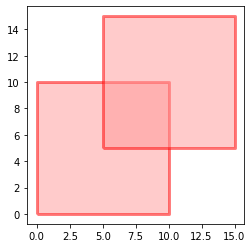

In [2]:
geom1 = wkt.loads("POLYGON((0 0, 10 0, 10 10, 0 10, 0 0))")
geom2 = wkt.loads("POLYGON((5 5, 15 5, 15 15, 5 15, 5 5))")
plot_geoms([geom1, geom2])

Touches?

Crosses?

Overlaps?

In [3]:
calc_predicates(geom1, geom2)

		AB	BA
Equals		False	False
Disjoint	False	False
Intersects	True	True
Touches		False	False
Crosses		False	False
Within		False	False
Contains	False	False
Overlaps	True	True
Covers		False	False



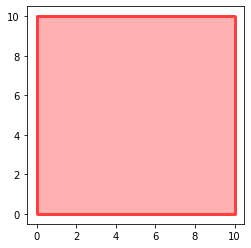

In [4]:
geom1 = wkt.loads("POLYGON((0 0, 10 0, 10 10, 0 10, 0 0))")
geom2 = wkt.loads("POLYGON((10 10, 10 0, 0 0, 0 10, 10 10))")
plot_geoms([geom1, geom2])

Look at the coordinates for these geometries, which sit on top of each other. The coordinates start at a different vertex, and the polygons have different orientations (clockwise and anti-clockwise)

Equals?

Touches?

Contains?

In [5]:
calc_predicates(geom1, geom2)

		AB	BA
Equals		True	True
Disjoint	False	False
Intersects	True	True
Touches		False	False
Crosses		False	False
Within		True	True
Contains	True	True
Overlaps	False	False
Covers		True	True



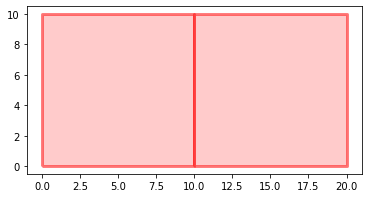

In [6]:
geom1 = wkt.loads("POLYGON((0 0, 10 0, 10 10, 0 10, 0 0))")
geom2 = wkt.loads("POLYGON((10 0, 20 0, 20 10, 10 10, 10 0))")
plot_geoms([geom1, geom2])

Intersects?

Touches?

Overlaps?

In [7]:
calc_predicates(geom1, geom2)

		AB	BA
Equals		False	False
Disjoint	False	False
Intersects	True	True
Touches		True	True
Crosses		False	False
Within		False	False
Contains	False	False
Overlaps	False	False
Covers		False	False



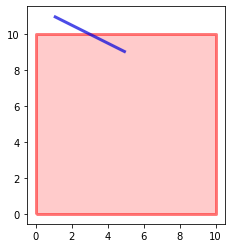

In [8]:
geom1 = wkt.loads("POLYGON((0 0, 10 0, 10 10, 0 10, 0 0))")
geom2 = wkt.loads("LINESTRING(1 11, 5 9)")
plot_geoms([geom1, geom2])

Line Crosses Polygon?

Line Covered By Polygon?

Line Overlaps Polygon?

In [9]:
calc_predicates(geom1, geom2)

		AB	BA
Equals		False	False
Disjoint	False	False
Intersects	True	True
Touches		False	False
Crosses		True	True
Within		False	False
Contains	False	False
Overlaps	False	False
Covers		False	False



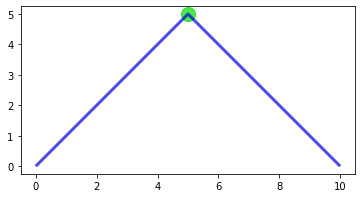

In [10]:
geom1 = wkt.loads("LINESTRING(0 0, 5 5, 10 0)")
geom2 = wkt.loads("POINT(5 5)")
plot_geoms([geom1, geom2])

Point Touches Line?

In [11]:
calc_predicates(geom1, geom2)

		AB	BA
Equals		False	False
Disjoint	False	False
Intersects	True	True
Touches		False	False
Crosses		False	False
Within		False	True
Contains	True	False
Overlaps	False	False
Covers		True	False



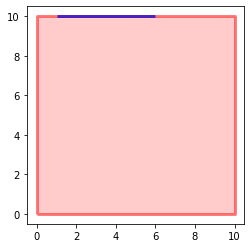

In [12]:
geom1 = wkt.loads("POLYGON((0 0, 10 0, 10 10, 0 10, 0 0))")
geom2 = wkt.loads("LINESTRING(1 10, 6 10)")
plot_geoms([geom1, geom2])

Polygon Covers Line?

Line Covers Polygon?

Line Touches Polygon?


In [13]:
calc_predicates(geom1, geom2)

		AB	BA
Equals		False	False
Disjoint	False	False
Intersects	True	True
Touches		True	True
Crosses		False	False
Within		False	False
Contains	False	False
Overlaps	False	False
Covers		True	False



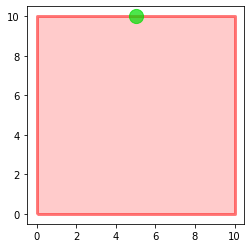

In [14]:
geom1 = wkt.loads("POLYGON((0 0, 10 0, 10 10, 0 10, 0 0))")
geom2 = wkt.loads("POINT(5 10)")
plot_geoms([geom1, geom2])

Polygon Contains Point?

Polygon Covers Point?

Point Within Polygon?

Point Touches Polygon?


In [15]:
calc_predicates(geom1, geom2)

		AB	BA
Equals		False	False
Disjoint	False	False
Intersects	True	True
Touches		True	True
Crosses		False	False
Within		False	False
Contains	False	False
Overlaps	False	False
Covers		True	False



# Named Spatial Predicates Discussion
The above spatial relationships (Equals, Touches, Crosses etc) are called 'Named Spatial Predicates'. Without having a clear understanding of what each one means, and how geometric relationships are defined, it is easy to make mistakes and get unanticipated results when using different predicates.

The predicates are defined within a wider definition of spatial relationships called the Dimensionally Extended 9-Intersection Model, or DE-9IM for short. There is a thorough description of this here:  https://en.wikipedia.org/wiki/DE-9IM and a simplified description here:  https://postgis.net/workshops/postgis-intro/de9im.html

The matrix defines the properties of the relationships between the Interior, Boundary and Exterior of a geometry. The definitions of these properties are as follows:

|         | Interior                                                         | Boundary                | Exterior                                   |   |
|---------|------------------------------------------------------------------|-------------------------|--------------------------------------------|---|
| Polygon | Any point within the rings of the polygon                        | The outer / inner rings | Any point outside the interior / boundary  |   |
| Line    | Any point along the lines after the end points have been removed | The two end points      | Any pointy outside the interior / boundary |   |
| Point   | The point location                                               | An empty set            | Any point not at the location of the point |   |

Named spatial predicates use these concepts in their definitions eg

- **Contains**:  “a contains b if no points of b lie in the exterior of a, and at least one point of the interior of b lies in the interior of a”

- **Touches**: “a touches b: they have at least one point in common, but their interiors do not intersect”

The predicate definitions also sometimes use the dimension of the intersection of the interior / boundary / exterior

2 = an area
1 = a line
0 = a point

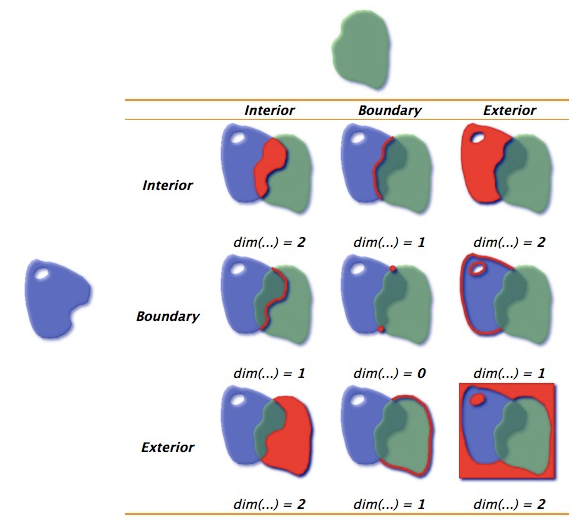

The Crosses predicate definition includes use of the dimension:

- **Crosses**:  “a crosses b: they have some but not all interior points in common, and the dimension of the intersection is less than that of at least one of them”

Use the description of the spatial predicates here:  https://en.wikipedia.org/wiki/DE-9IM#Spatial_predicates to go back over the examples above and make sure you understand the answers.



## Using the Intersection Matrix to Query for Custom Relationships
### Example 1:  Selecting features interacting with a tile
Sometimes there is a specific spatial relationship you want to filter by for which no pre-cannned named spatial relationship exists. For example:

  - for a specific rectangular tile, I want:
    - all polygons completely within the tile
    - all polygons within and intersecting the boundary
    - all polygons overlapping the tile
    
  - I do not want:
    - polygons that are completely outside the tile
    - polygons that touch the boundary of the tile
    
This could be achieved with a number of separate filters, but the DE-9IM matrix allows us to simplify the problem. In the example below the polygons on the left are valid, and those on the right are invalid. The 'tile' is shown in blue.
      

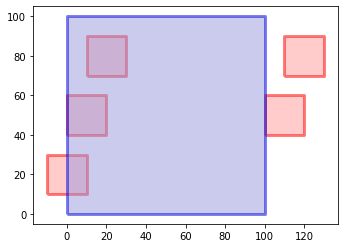

In [16]:
tile_geom = wkt.loads("POLYGON((0 0, 100 0, 100 100, 0 100, 0 0))")
valid_geoms = [
    wkt.loads("POLYGON((10 70, 30 70, 30 90, 10 90, 10 70))"), # Completely within
    wkt.loads("POLYGON((0 40, 20 40, 20 60, 0 60, 0 40))"), # Within but intersecting the boundary
    wkt.loads("POLYGON((-10 10, 10 10, 10 30, -10 30, -10 10))"), # Overlapping
]
invalid_geoms = [
    wkt.loads("POLYGON((110 70, 130 70, 130 90, 110 90, 110 70))"), # Completely outside
    wkt.loads("POLYGON((100 40, 120 40, 120 60, 100 60, 100 40))"), # Touching
]
plot_polys_dual_color(valid_geoms + invalid_geoms, [tile_geom])


- You can define your own ‘custom’ DE-9IM filters using the matrix of relationships between the interior, boundary and exterior of two geometries
- You can specify the dimension (0, 1 , 2), True or False (T, F), or a * where the relationship isn’t important
- For example, to filter the valid polygons on the left above, we can use the following filter:

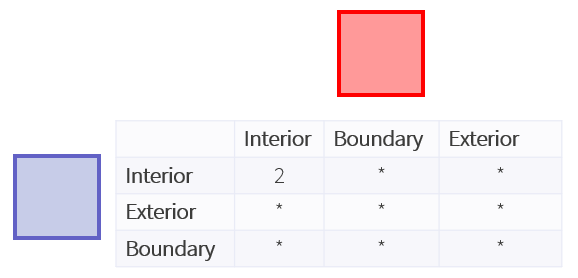

This can be written:  2\*\*\*\*\*\*\*\*

We can use the that 'pattern' to filter out just the valid cases as follows:

In [17]:
def test_rels(geom1, geom_list, pattern1):
    for geom in geom_list:
        print(f"Relate pattern: {tile_geom.relate(geom)}")
        print(f"Relate result: {tile_geom.relate_pattern(geom, pattern1)}")

# Matrix where the intersection of the interiors results in an area (2)
pattern = "2********"

print("Valid geometries:")
test_rels(tile_geom, valid_geoms, pattern)

print("\nInvalid geometries:")
test_rels(tile_geom, invalid_geoms, pattern)

Valid geometries:
Relate pattern: 212FF1FF2
Relate result: True
Relate pattern: 212F11FF2
Relate result: True
Relate pattern: 212101212
Relate result: True

Invalid geometries:
Relate pattern: FF2FF1212
Relate result: False
Relate pattern: FF2F11212
Relate result: False


### Example 2:  Valid jetties
This scenario is where I have a water polygon, and I want to verify that a jetty, represented by a line, is always inside the polygon, one end is in the water, and one end is on the boundary of the water polygon.
 
I do not want:
- lines that are completely within the interior
- lines that cross the boundary
- lines disjoint from the water polygon
- lines touching the water polygon  

In the example below, the valid examples are on the left and the invalid on the right.

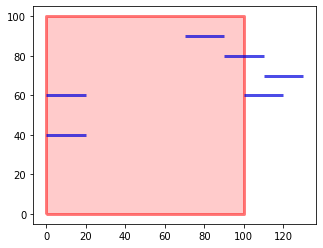

In [18]:
tile_geom = wkt.loads("POLYGON((0 0, 100 0, 100 100, 0 100, 0 0))")
valid_geoms = [
    wkt.loads("LINESTRING(0 40, 20 40)"), # One end touches, one end in water poly
    wkt.loads("LINESTRING(0 60, 20 60)"), # One end touches, one end in water poly
]
invalid_geoms = [
    wkt.loads("LINESTRING(70 90, 90 90)"), # Completely inside
    wkt.loads("LINESTRING(90 80, 110 80)"), # Crosses boundary
    wkt.loads("LINESTRING(110 70, 130 70)"), # Disjoint
    wkt.loads("LINESTRING(100 60, 120 60)"), # Touching
]
all_geoms = [tile_geom] + valid_geoms + invalid_geoms
# create_data_frame(all_geoms).plot(cmap="tab10", alpha=0.5)
plot_geoms(all_geoms)

The pattern 1\*\*\*0\*\*\*\* can be used to select just the valid geometries, which defines that the intersection of the interior of the line and polygon must result in a line (1) and the intersection of the boundaries of the line and polygon must result in a point (0)

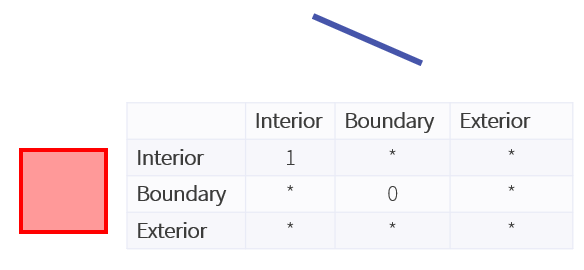

In [19]:
def test_rels(geom1, geom_list, pattern1):
    for geom in geom_list:
        print(f"Relate pattern: {tile_geom.relate(geom)}")
        print(f"Relate result: {tile_geom.relate_pattern(geom, pattern1)}")

pattern1 = "1***0****"

print("Valid geometries:")
test_rels(tile_geom, valid_geoms, pattern1)

print("\nInvalid geometries:")
test_rels(tile_geom, invalid_geoms, pattern1)

Valid geometries:
Relate pattern: 102F01FF2
Relate result: True
Relate pattern: 102F01FF2
Relate result: True

Invalid geometries:
Relate pattern: 102FF1FF2
Relate result: False
Relate pattern: 1020F1102
Relate result: False
Relate pattern: FF2FF1102
Relate result: False
Relate pattern: FF2F01102
Relate result: False


Let's add another invalid case, a line which starts and ends on the boundary of the water polygon

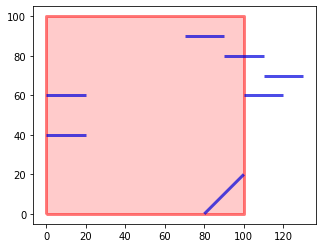

In [20]:
invalid_geoms = [
    wkt.loads("LINESTRING(70 90, 90 90)"), # Completely inside
    wkt.loads("LINESTRING(90 80, 110 80)"), # Crosses boundary
    wkt.loads("LINESTRING(110 70, 130 70)"), # Disjoint
    wkt.loads("LINESTRING(100 60, 120 60)"), # Touching
    wkt.loads("LINESTRING(80 0, 100 20)"), # Both ends on boundary
]

all_geoms = [tile_geom] + valid_geoms + invalid_geoms
# create_data_frame(all_geoms).plot(cmap="tab10", alpha=0.5)
plot_geoms(all_geoms)

Now when we run the validation, one invalid geometry incorrectly returns True:

In [21]:
pattern1 = "1***0****"

print("Valid geometries:")
test_rels(tile_geom, valid_geoms, pattern1)

print("\nInvalid geometries:")
test_rels(tile_geom, invalid_geoms, pattern1)

Valid geometries:
Relate pattern: 102F01FF2
Relate result: True
Relate pattern: 102F01FF2
Relate result: True

Invalid geometries:
Relate pattern: 102FF1FF2
Relate result: False
Relate pattern: 1020F1102
Relate result: False
Relate pattern: FF2FF1102
Relate result: False
Relate pattern: FF2F01102
Relate result: False
Relate pattern: 1F2F01FF2
Relate result: True


We need to modify the string to ensure one end (boundary) of the line intersects the interior of the polygon, resulting in a dimension of 0 (a point)

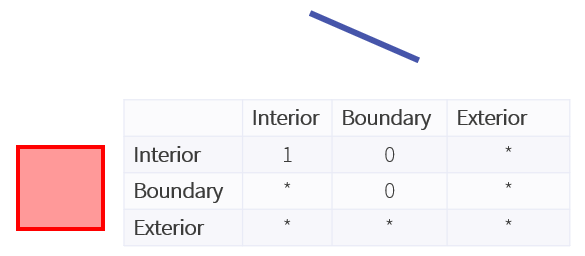

In [22]:
#pattern1 = "1***0****"
pattern1 = "10**0****"

print("Valid geometries:")
test_rels(tile_geom, valid_geoms, pattern1)

print("\nInvalid geometries:")
test_rels(tile_geom, invalid_geoms, pattern1)

Valid geometries:
Relate pattern: 102F01FF2
Relate result: True
Relate pattern: 102F01FF2
Relate result: True

Invalid geometries:
Relate pattern: 102FF1FF2
Relate result: False
Relate pattern: 1020F1102
Relate result: False
Relate pattern: FF2FF1102
Relate result: False
Relate pattern: FF2F01102
Relate result: False
Relate pattern: 1F2F01FF2
Relate result: False


Let's add another invalid case, a line which shares a segment with the boundary of the water polygon

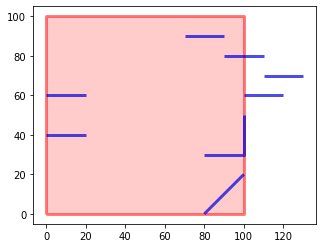

In [23]:
invalid_geoms = [
    wkt.loads("LINESTRING(70 90, 90 90)"), # Completely inside
    wkt.loads("LINESTRING(90 80, 110 80)"), # Crosses boundary
    wkt.loads("LINESTRING(110 70, 130 70)"), # Disjoint
    wkt.loads("LINESTRING(100 60, 120 60)"), # Touching
    wkt.loads("LINESTRING(80 0, 100 20)"), # Both ends on boundary
    wkt.loads("LINESTRING(100 50, 100 30, 80 30)"), # Shares segment with
]

all_geoms = [tile_geom] + valid_geoms + invalid_geoms
# create_data_frame(all_geoms).plot(cmap="tab10", alpha=0.5)
plot_geoms(all_geoms)

In [24]:
pattern1 = "10**0****"

print("Valid geometries:")
test_rels(tile_geom, valid_geoms, pattern1)

print("\nInvalid geometries:")
test_rels(tile_geom, invalid_geoms, pattern1)

Valid geometries:
Relate pattern: 102F01FF2
Relate result: True
Relate pattern: 102F01FF2
Relate result: True

Invalid geometries:
Relate pattern: 102FF1FF2
Relate result: False
Relate pattern: 1020F1102
Relate result: False
Relate pattern: FF2FF1102
Relate result: False
Relate pattern: FF2F01102
Relate result: False
Relate pattern: 1F2F01FF2
Relate result: False
Relate pattern: 102101FF2
Relate result: True


We need to modify the string to prevent the interaction between the interior of the line and the boundary of the polygon, by adding a 'F' to that element

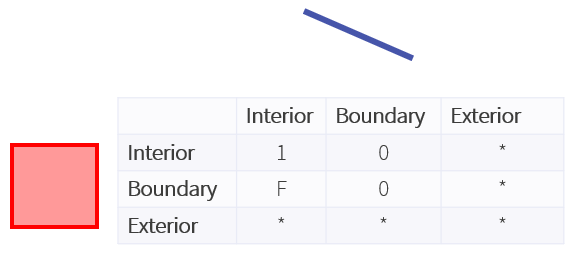

In [25]:
#pattern1 = "10**0****"
pattern1 = "10*F0****"

print("Valid geometries:")
test_rels(tile_geom, valid_geoms, pattern1)

print("\nInvalid geometries:")
test_rels(tile_geom, invalid_geoms, pattern1)

Valid geometries:
Relate pattern: 102F01FF2
Relate result: True
Relate pattern: 102F01FF2
Relate result: True

Invalid geometries:
Relate pattern: 102FF1FF2
Relate result: False
Relate pattern: 1020F1102
Relate result: False
Relate pattern: FF2FF1102
Relate result: False
Relate pattern: FF2F01102
Relate result: False
Relate pattern: 1F2F01FF2
Relate result: False
Relate pattern: 102101FF2
Relate result: False


## Useful links
[Wikipedia DE-9IM page](https://en.wikipedia.org/wiki/DE-9IM)

[PostGIS DE-9IM documentation](https://postgis.net/workshops/postgis-intro/de9im.html)

[Shapely Spatial Predicate Support](https://shapely.readthedocs.io/en/stable/manual.html#binary-predicates)

[Shapely DE-9IM functions](https://shapely.readthedocs.io/en/stable/manual.html#de-9im-relationships)

